# TASK 3 - CAR PRICE PREDICTION WITH MACHINE LEARNING

### Problem Statement: 

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

### Solution:

In [29]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading Data
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv")

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Checking for null values
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data = data.drop_duplicates()

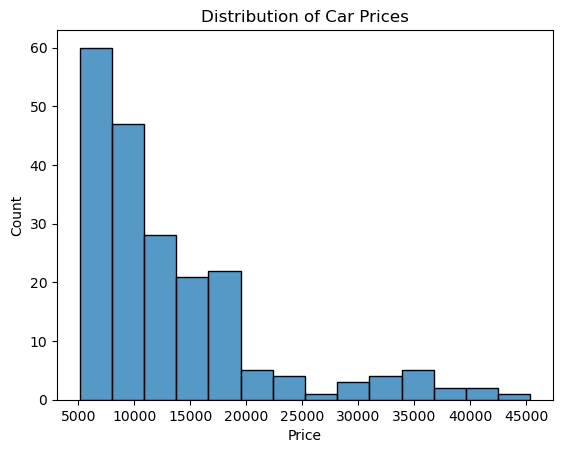

In [10]:
sns.histplot(data['price'])
plot.title('Distribution of Car Prices', color='black')
plot.xlabel('Price', color='black')
plot.ylabel('Count', color='black')
plot.xticks(color='black')
plot.yticks(color='black')
plot.show()



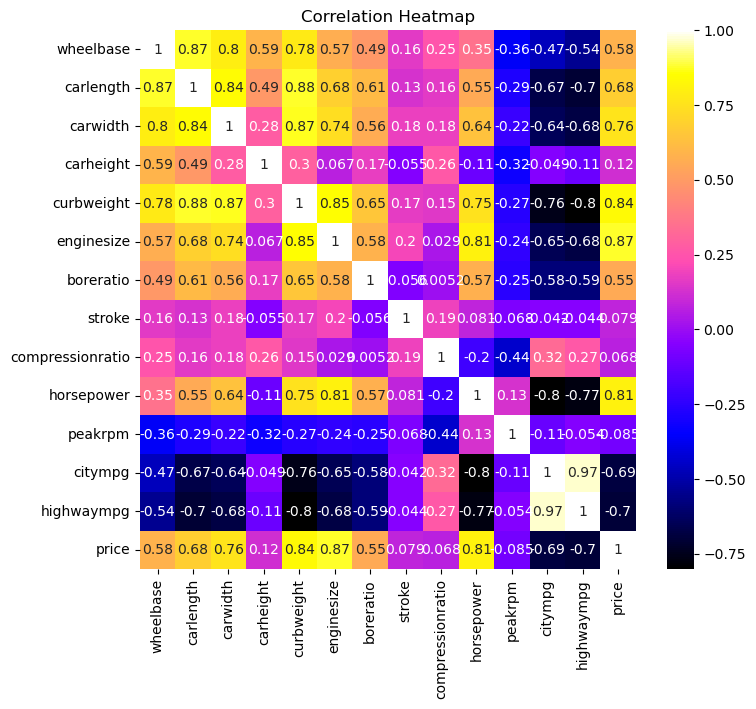

In [15]:
numeric_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                    'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                    'peakrpm', 'citympg', 'highwaympg', 'price']
correlation_mat = data[numeric_features].corr()
plot.figure(figsize=(8,7))
sns.heatmap(correlation_mat, annot=True, cmap='gnuplot2')
plot.title('Correlation Heatmap', color='black')
plot.xticks(color='black')
plot.yticks(color='black')
plot.show()

In [16]:
# Preprocessing Data
feature_cols = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
                'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
                'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
                'citympg', 'highwaympg']

target_col = 'price'
X = data[feature_cols]
y = data[target_col]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])

In [20]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

In [22]:
# Fitting the model
mod = LinearRegression()
mod.fit(X_train, y_train)

LinearRegression()

In [23]:
# Evaluation
preds = mod.predict(X_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3360.138448116182


In [26]:
# Prediction
new_car_data = [[2, 'diesel', 'std', 'four', 'convertible', 'fwd', 'front', 100, 120, 68.0, 57.5, 2900, 'ohc', 'four',
                 115, 'mpfi', 3.50, 2.80, 8.5, 110, 5500, 30, 38]]
new_car_df = pd.DataFrame(new_car_data, columns=feature_cols)
new_car_encoded = pd.get_dummies(new_car_df, drop_first=True)
new_car_encoded = new_car_encoded.reindex(columns=X_train.columns, fill_value=0)
predicted_price = mod.predict(new_car_encoded)
print("Predicted Price:", predicted_price)

Predicted Price: [16619.29870092]
